# Machine Learning & Neural Networks Demonstration
***
By [Alejandro Ciuba](https://alejandrociuba.github.io), alejandrociuba@gmail.com
***
## Table of Contents
1. [Scikit Learn's Naive Bayes' Classifier - Austen vs. Melville](#1-scikit-learns-naive-bayes-classifier---austen-vs-melville)
2. [PyTorch (Small FFNN Model)](#2-pytorch-small-ffnn-model)
3. [Hugging Face Demo](#3-hugging-face-demo)
***
## Necessary Imports & Installs
These imports will be used throughout the whole notebook. This code cell should be ran after every restart of the kernel

In [55]:
# Install Hugging Face modules
! pip install transformers
! pip install evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
# General imports
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random as rand
import nltk

# Scikit Learn
from sklearn.model_selection import train_test_split # We'll use this a lot even though it's an sklearn function
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# PyTorch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch

# Hugging Face
from transformers import pipeline
import evaluate

In [ ]:
# Download the gutenberg corpus and punkt tokenizer
nltk.download('gutenberg')
nltk.download('punkt')
from nltk.corpus import gutenberg

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


***
## 1. Scikit Learn's Naive Bayes' Classifier - Austen vs. Melville
Here, we'll revisit the task of labelling a given sentence as either a sentence written by Jane Austen or Herman Melville. However, this time we'll use _Scikit Learn's_ [_Categorical Naive Bayes' Classifier_](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html#sklearn.naive_bayes.CategoricalNB), a NB Classifier tailored to categorical data-labelling tasks.

In [ ]:
# First, we need to get the data, the individual sentences
a_sents = [' '.join(sent) for sent in gutenberg.sents('austen-emma.txt')]
m_sents = [' '.join(sent) for sent in gutenberg.sents('melville-moby_dick.txt')]

# Turn it into an np.array
all_sents = np.concatenate([a_sents, m_sents])

# Make an np.array for the labels
all_labels = np.array(['austen'] * len(a_sents) + ['melville'] * len(m_sents))

print(len(all_sents), len(all_labels))
print(all_sents.shape)
print(all_sents[10192], all_labels[10192])
print(type(all_sents))

17776 17776
(17776,)
But now comes the greatest joke of the dream , Flask . melville
<class 'numpy.ndarray'>


In [ ]:
# Now, we need to do our train-test split. Conveniently, sklearn has a function just for that
X_train, X_test, y_train, y_test = train_test_split(all_sents, all_labels, test_size=1/3, random_state=0)

print(len(X_train), len(X_test))
print(X_train[314], y_train[314])

11850 5926
But now comes the greatest joke of the dream , Flask . melville


In [ ]:
# We need to create a pipeline! This pipeline will automatically tokenize our data and then feed it into the model
nbmodel = make_pipeline(TfidfVectorizer(max_features=1500, stop_words='english'), MultinomialNB())

# Now, we need to train the model by fitting the training data to it. Very simple in sklearn!
nbmodel.fit(X_train, y_train)

nbmodel

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=1500, stop_words='english')),
                ('multinomialnb', MultinomialNB())])

Accuracy: 90.432% 


Text(0.5, 1.0, 'Heatmap of predicted vs. correct authors\non Austen vs. Melville')

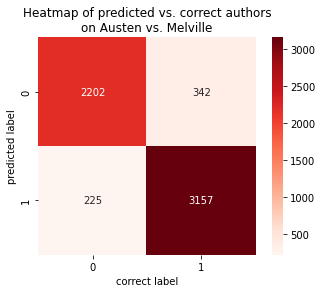

In [ ]:
# Now let's test
plabels = nbmodel.predict(X_test)

# Get base accuracy
acc = accuracy_score(y_test, plabels) * 100
print(f"Accuracy: {acc:.{5}}% ")

# Create a heatmap to examine which are right and wrong
mat = confusion_matrix(y_test, plabels)
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap="Reds")
plt.xlabel('correct label')
plt.ylabel('predicted label')
plt.title('Heatmap of predicted vs. correct authors\non Austen vs. Melville')

In [ ]:
# Let's try it ourselves
print(nbmodel.predict(["Wow, this was a really cool thing to do and wasn't hard to set up!"]))
print(nbmodel.predict(["I am absolutely crushed Mr. Bayes rejected my invitation to the destruction of the world!"]))
print(nbmodel.predict(["This is Mr. Herman Austen writing. How goes your day, my friend, Queequeg?"])) # Notice how one feature holds a lot of power?

['melville']
['austen']
['melville']


***
## 2. PyTorch (Small FFNN Model)
This will be a simple _Feed Forward Neural Network_ with fully connected layers. This will demonstrate how neural networks are bad at deterministic tasks like logic operators. Here, we will try to train a neural network to recognize the correct output of a logical operator given two binary numbers (AND, OR, XOR). To create our data, the format will be a vector of length 3 such that:

`[int([0,1]), int([0,1]), int([0,2])]` where the first two numbers are either 0 or 1 and the third corresponds to the logical operator (AND = 0, OR = 1, XOR = 2)

### Doing Things The Old-Fashioned Way

In [ ]:
# Function to create output labels (look we did it, lmfao)
def output_old(nums:list, op:int) -> int:
    if op == 0:
        return nums[0] & nums[1]
    elif op == 1:
        return nums[0] | nums[1]
    else:
        return nums[0] ^ nums[1]

# Let's create our training and testing data
size = 10000
num1 = [rand.randint(0, 1) for i in range(size)]
num2 = [rand.randint(0, 1) for i in range(size)]
op = [rand.randint(0, 2) for i in range(size)]
dataset = np.array([[num1, num2, op] for num1, num2, op in zip(num1, num2, op)])
print(dataset.shape)
print(dataset[100])

# Now for the labels
labels = np.array([output_old([data[0], data[1]], data[2]) for data in dataset])
print(labels.shape)
print(dataset[100], labels[100])

(10000, 3)
[0 1 1]
(10000,)
[0 1 1] 1


In [ ]:
# Let's split it into our train-test split
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=1/4, random_state=0)

print(len(X_train), len(X_test))
print(X_train[314], y_train[314])

7500 2500
[0 1 0] 0


### Now For The PyTorch Way

In [57]:
# Create a specialized dataset class to make the training loop easier
# Class also modifed to have transforms
class BinaryOpsDataset(Dataset):
    def __init__(self, n=100, transform=None):

        # Let's create our training and testing data
        self.n = n
        num1 = [rand.randint(0, 1) for i in range(n)]
        num2 = [rand.randint(0, 1) for i in range(n)]
        op = [rand.randint(0, 2) for i in range(n)]
        self.x = np.array([[num1, num2, op] for num1, num2, op in zip(num1, num2, op)])

        # Now for the labels
        self.y = np.array([self.output([data[0], data[1]], data[2]) for data in self.x])

        # And any necessary transformations
        self.transform = transform

    def __len__(self):
        return self.n

    def __getitem__(self, index):

        if self.transform:
            return self.transform((self.x[index], self.y[index]))
        else:
            return self.x[index], self.y[index]

    def output(self, nums:list, op:int) -> int:
        """
        Same function as before, just made a class method.
        """

        if op == 0:
            return int(nums[0]) & int(nums[1])
        elif op == 1:
            return int(nums[0]) | int(nums[1])
        else:
            return int(nums[0]) ^ int(nums[1])

# Create a custom transforms
class ToTensor():
    def __call__(self, sample):
        inputs, targets = sample
        return torch.from_numpy(np.asarray(inputs)), torch.from_numpy(np.asarray(targets))

# Create our dataset, contains data
n = 50000
train_dataset = BinaryOpsDataset(n, transform=ToTensor())
test_dataset = BinaryOpsDataset(n, transform=ToTensor())
print(train_dataset[100])


# Create our dataloader, used to iterate through the training loop more easily
train_dataloader = DataLoader(dataset=train_dataset, batch_size=40, shuffle=True, num_workers=2) # Subprocs
test_dataloader = DataLoader(dataset=test_dataset, batch_size=40, shuffle=True, num_workers=2) # Subprocs

(tensor([1, 1, 1]), tensor(1))


In [60]:
# Now this is where things get a little bit complicated. We need to make a class to store the neural network
# First, here are all the hyperparameters it'll have
# Length of a datapoint
input_size = 3

# How many "nodes" each hidden layer will have, kind of arbitrary without optimization searches
hidden_size = 16

# The number of classes it'll be asked to identify (2)
num_classes = 2

# Learning rate, how quickly it should "accept/learn" new data (the step size of our gradient descent)
learning_rate = .001

# How many epochs (iteration through the entire training data) there are
num_epochs = 6

# Create the Neural Network, a fully connected FFNN (Perceptron)
class FFNN(nn.Module):

    def __init__(self, input_size, hidden_size, num_classes, /):

        # This is required for any NN class
        super(FFNN, self).__init__()

        # Create layers
        self.l1 = nn.Linear(input_size, hidden_size)

        # The activation function used between each layer
        self.activation = nn.ReLU()

        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        """
        This is the function called for a prediction, feeding the data through our model in-order
        """
        
        out = self.l1(x)
        out = self.activation(out)
        out = self.l2(out)
        return out

# Create our model
model = FFNN(input_size, hidden_size, num_classes)

# Loss and Optimizer
# Loss is how we calculate the loss (the loss function) and optimizer is an additional step for performance
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [61]:
# Harness GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move model to device
model = model.to(device)

# Training loop
total_samples = len(train_dataset)

# Steps per epoch
n_total_steps = len(train_dataloader)

for epoch in range(num_epochs):
    for i, (logic_ops, labels) in enumerate(train_dataloader):

        # Convert to float32 and push to GPU
        inputs = logic_ops.to(torch.float32).to(device)
        labels = labels.to(device)

        # Forward and Loss        
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward Pass
        optimizer.zero_grad() # Clear grads from last cycle
        loss.backward()
        optimizer.step()

        if (i + 1) % 625 == 0:
            print('epoch: %d/%d, step: %d/%d, loss=%.4ff' % (epoch+1, num_epochs, i+1, n_total_steps, loss.item()))

epoch: 1/6, step: 625/1250, loss=0.4200f
epoch: 1/6, step: 1250/1250, loss=0.1397f
epoch: 2/6, step: 625/1250, loss=0.0710f
epoch: 2/6, step: 1250/1250, loss=0.0320f
epoch: 3/6, step: 625/1250, loss=0.0158f
epoch: 3/6, step: 1250/1250, loss=0.0091f
epoch: 4/6, step: 625/1250, loss=0.0065f
epoch: 4/6, step: 1250/1250, loss=0.0038f
epoch: 5/6, step: 625/1250, loss=0.0022f
epoch: 5/6, step: 1250/1250, loss=0.0015f
epoch: 6/6, step: 625/1250, loss=0.0012f
epoch: 6/6, step: 1250/1250, loss=0.0008f


In [62]:
# Testing
# No grad means it doesn't save data for back propagation
with torch.no_grad():
    n_correct = 0
    n_samples = 0

    for logic_ops, labels in test_dataloader:

        # Convert to float32 and push to GPU
        inputs = logic_ops.to(torch.float32).to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        
        # Since the cross-entropy loss also applied the softmax,
        # We need to interpret the results ourselves here.
        # Rows of vectors, we want the max from the vectors
        # max_value, index of value respective to its demension
        _, preds = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (preds == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print('Accuracy=%.4f' % acc)

Accuracy=100.0000


In [67]:
    # Test our model ourselves
    input = [1,0,2]
    op = ''
    
    if input[2] == 0:
        op = '&'
    elif input[2] == 1:
        op = '|'
    elif input[2] == 2:
        op = '^'
    else:
        op = 'WHAT'

    """
    Looks complicated, but this is just a format string saying take our input, format it like integer operator integer.
    Then, take the model's output, find out the answer by getting the index of the max value (the 2nd item in the tuple)
    and then cast that to an int to make it consistent with the rest. Remember, linear layers like floats, so when we
    turn our input into a tensor for the model to run through itself, we need to cast the numbers as floats. We also
    need to push the tensor to the device we're using to make things consistent (and also utilize the GPU if we have one).
    """
    print("%d %s %d = %d" % (input[0], op, input[1], int(torch.max(model(torch.tensor(input, dtype=torch.float32).to(device)), 0)[1].item())))

1 ^ 0 = 1


***
## 3. Hugging Face Demo
This will be just a quick demo on how to use an _NLP-based Hugging Face Pretrained Transformer Model_. They are very easy to use and can be easily added to a given program to give it some more functionality.

### Default Transformers

In [68]:
# First, just a general task but no Transformer specified; defaults to one
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
classifier('This is my very first hugging face transformer model. It seems really nice to use!')

[{'label': 'POSITIVE', 'score': 0.9995996356010437}]

### Picking Our Own
The [website](https://huggingface.co) makes this very easy! Let's pick one! The one this notebook is currently using is the [_T5\_Small_](https://huggingface.co/t5-small), but feel free to rewrite to pick your own!

In [69]:
from transformers import AutoTokenizer, AutoModelWithLMHead

tokenizer = AutoTokenizer.from_pretrained("t5-small")

model = AutoModelWithLMHead.from_pretrained("t5-small")

/usr/local/lib/python3.8/dist-packages/transformers/models/t5/tokenization_t5_fast.py:156: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-small automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/transformers/models/auto/modeling_auto.py:1132: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language 

In [70]:
# There's a lot of documentation on how to use this transformer (https://huggingface.co/docs/transformers/main/en/model_doc/t5#inference)
input_ids = tokenizer("translate English to Romanian: The house is wonderful.", return_tensors="pt").input_ids
outputs = model.generate(input_ids)
print(prediction := tokenizer.decode(outputs[0], skip_special_tokens=True))

Casa este minunată.


### Output Values
* `bleu (float)`: bleu score
* `precisions (list of floats)`: geometric mean of n-gram precisions,
* `brevity_penalty (float)`: brevity penalty,
* `length_ratio (float)`: ratio of lengths,
* `translation_length (int)`: translation_length,
* `reference_length (int)`: reference_length

In [71]:
# Let's evaluate with BLEU (https://huggingface.co/spaces/evaluate-metric/bleu)
reference = [['Casa este mica']]
prediction = [prediction]

# Load in BLEU
bleu = evaluate.load('bleu')

print(bleu.compute(predictions=prediction, references=reference))

{'bleu': 0.0, 'precisions': [0.5, 0.3333333333333333, 0.0, 0.0], 'brevity_penalty': 1.0, 'length_ratio': 1.3333333333333333, 'translation_length': 4, 'reference_length': 3}
